<h1 style="background-color:skyblue;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>



* [1. Libraires And Utilities](#1)
* [2. Data Collection and Importing](#2)

* [3 Data Exploration and Cleaning](#3)

* [4 Feature Engineering](#4)
    * [4.1 Vader Sentiment Analyzer](#4.1)
    * [4.2 Naive Feature Extraction](#4.2)
    * [4.3 Named Entity Extraction](#4.3)
    * [4.4 Sentiment Analysis](#4.4)
    * [4.5 Time based Sentiment Analysis](#4.5)
   
* [5. Results](#5)
    * [5.1 Pie Chart of sentiment count](#5.1)
    * [5.2 Positive Score Comments](#5.2) 
    * [5.3 Negative Score Comments](#5.3)
    * [5.4 Visualization of Sentiment scores](#5.4)
    * [5.5 WordCloud of All Sentiments](#5.5)
    * [5.6 Frequency of  words for Sentiments](#5.6)
    

<a id="1"></a>

<h1 style="background-color:lightblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraires And Utilities</h1>

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [58]:
!pip install twython 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import Isomap
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
nltk.download('vader_lexicon')
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR,AutoReg
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy as sp
nlps = sp.load("en_core_web_sm")
import random
plt.rc('figure',figsize=(17,13))
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



<a id="2"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Collection and Importing</h1>

In [59]:
# Read data from CSV file
#source_data = pd.read_csv("/kaggle/input/reddit-israelpalestine-posts/reddit_posts.csv")
#source_data["timestamp"] = source_data["timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))

In [60]:
import pandas as pd
import os

# List of file names
file_names = [
    "IsraelHamas_reddit_posts.csv",
    "IsraelPalestine_reddit_posts.csv",
    "IsraelUnderAttack_reddit_posts.csv",
    "IsraelWar_reddit_posts.csv",
    "Israel_Palestine_reddit_posts.csv",
    "IsrealPalestineWar_23_reddit_posts.csv",
    "hamasdeadlyattack_reddit_posts.csv"
]

# Initialize an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# Loop through each file and merge it into the main DataFrame
for file_name in file_names:
    # Assuming the CSV files have a common structure, you can use read_csv to load them
    df = pd.read_csv("/kaggle/input/israelpalestine-data/Israelpalestine_reddit_data/" + file_name)
    
    # Merge the current DataFrame with the main DataFrame
    merged_df = pd.concat([merged_df, df], ignore_index=True)
merged_df["timestamp"] = merged_df["timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
# Display the merged DataFrame
print(merged_df)



                                                    title  score       id  \
0       ‎Joe Rogan on how the mainstream perception ha...     24  179kgpg   
1       Belgian filmmaker with EU, UN, genocide docume...     23  17837su   
2                  Brave hot dilevery from qasam fighter      20  17n3qv9   
3       Gabor Mate "Holocaust survivor" speaks about P...     14  177dwcd   
4       No one really cares about thousands of Palesti...     10  17zq9qd   
...                                                   ...    ...      ...   
124995  Another video from Shifa Hospital in the Gaza ...     36  17z59c8   
124996  Hospitals per 1K square KM: Germany 5.2, Japan...     34  17ulyil   
124997  Would you agree to have these people as your n...     35  17twyq9   
124998  The Islamic radical brainwash in Gaza. Our ene...     33  17j0mgk   
124999  Hamas terrorists and their Gazan aides tried t...     36  185zvot   

                                                url  comms_num       create

In [61]:
merged_df.head()

title  score       id  \
0  ‎Joe Rogan on how the mainstream perception ha...     24  179kgpg   
1  Belgian filmmaker with EU, UN, genocide docume...     23  17837su   
2             Brave hot dilevery from qasam fighter      20  17n3qv9   
3  Gabor Mate "Holocaust survivor" speaks about P...     14  177dwcd   
4  No one really cares about thousands of Palesti...     10  17zq9qd   

                                           url  comms_num       created body  \
0              https://v.redd.it/r2to5i5zinub1          4  1.697500e+09  NaN   
1              https://v.redd.it/4pfmrp9og9ub1          8  1.697330e+09  NaN   
2              https://v.redd.it/guwox9ftu6yb1          0  1.699042e+09  NaN   
3  https://www.youtube.com/watch?v=6n6xvFw7r9Y          3  1.697246e+09  NaN   
4          https://i.redd.it/0v05hr3jni1c1.png         24  1.700492e+09  NaN   

            timestamp    subreddit  
0 2023-10-16 23:46:37  IsraelHamas  
1 2023-10-15 00:29:12  IsraelHamas  
2 2023-11-03 20:06:16  IsraelHamas  
3 2023-10-14 01:13:35  IsraelHamas  
4 2023-11-20 14:54:02  IsraelHamas

In [62]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   title      125000 non-null  object        
 1   score      125000 non-null  int64         
 2   id         125000 non-null  object        
 3   url        125000 non-null  object        
 4   comms_num  125000 non-null  int64         
 5   created    125000 non-null  float64       
 6   body       68295 non-null   object        
 7   timestamp  125000 non-null  datetime64[ns]
 8   subreddit  125000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 8.6+ MB



<a id="3"></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Exploration and Cleaning</h1>

In [63]:
merged_df.sample(5)

title  score       id  \
43602                I'm far left and I stand with Israel    278  17w6s3h   
59920   Pro-Palestinians who say the Jews are “Europea...    120   tbk521   
87992   Catastrophic Thinking: Did Ben Gurion Try to R...      8   p7vbvl   
104701               Less than a year baby killed in gaza      0  17i5wng   
38745                          The Israel & Iran conflict    168   lb9cr8   

                                                      url  comms_num  \
43602   https://www.reddit.com/r/IsraelPalestine/comme...        578   
59920   https://www.reddit.com/r/IsraelPalestine/comme...        507   
87992   https://jewishvoiceforpeace.org/2013/09/catast...         53   
104701                https://i.redd.it/f3nb9apjevwb1.jpg         38   
38745                 https://i.redd.it/p3knzgktb5f61.jpg         31   

             created                                               body  \
43602   1.700090e+09  It hugely confuses me why the anti Israel side...   
59920   1.646981e+09  I’m going to make this question about the Ashk...   
87992   1.629435e+09                                                NaN   
104701  1.698467e+09  This baby was killed in Gaza. How come a one y...   
38745   1.612307e+09                                                NaN   

                 timestamp              subreddit  
43602  2023-11-15 23:05:10        IsraelPalestine  
59920  2022-03-11 06:51:21        IsraelPalestine  
87992  2021-08-20 04:49:31       Israel_Palestine  
104701 2023-10-28 04:24:05  IsrealPalestineWar_23  
38745  2021-02-02 23:08:05        IsraelPalestine

In [64]:
import pandas as pd

# Assuming df is your DataFrame containing Reddit data
df = merged_df.drop_duplicates()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16300 entries, 0 to 124952
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      16300 non-null  object        
 1   score      16300 non-null  int64         
 2   id         16300 non-null  object        
 3   url        16300 non-null  object        
 4   comms_num  16300 non-null  int64         
 5   created    16300 non-null  float64       
 6   body       7107 non-null   object        
 7   timestamp  16300 non-null  datetime64[ns]
 8   subreddit  16300 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [66]:
#df.rename(columns={'body': 'title', 'title': 'body'}, inplace=True)

In [67]:
df.head()

title  score       id  \
0  ‎Joe Rogan on how the mainstream perception ha...     24  179kgpg   
1  Belgian filmmaker with EU, UN, genocide docume...     23  17837su   
2             Brave hot dilevery from qasam fighter      20  17n3qv9   
3  Gabor Mate "Holocaust survivor" speaks about P...     14  177dwcd   
4  No one really cares about thousands of Palesti...     10  17zq9qd   

                                           url  comms_num       created body  \
0              https://v.redd.it/r2to5i5zinub1          4  1.697500e+09  NaN   
1              https://v.redd.it/4pfmrp9og9ub1          8  1.697330e+09  NaN   
2              https://v.redd.it/guwox9ftu6yb1          0  1.699042e+09  NaN   
3  https://www.youtube.com/watch?v=6n6xvFw7r9Y          3  1.697246e+09  NaN   
4          https://i.redd.it/0v05hr3jni1c1.png         24  1.700492e+09  NaN   

            timestamp    subreddit  
0 2023-10-16 23:46:37  IsraelHamas  
1 2023-10-15 00:29:12  IsraelHamas  
2 2023-11-03 20:06:16  IsraelHamas  
3 2023-10-14 01:13:35  IsraelHamas  
4 2023-11-20 14:54:02  IsraelHamas

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16300 entries, 0 to 124952
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      16300 non-null  object        
 1   score      16300 non-null  int64         
 2   id         16300 non-null  object        
 3   url        16300 non-null  object        
 4   comms_num  16300 non-null  int64         
 5   created    16300 non-null  float64       
 6   body       7107 non-null   object        
 7   timestamp  16300 non-null  datetime64[ns]
 8   subreddit  16300 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [69]:
#for i in range(10):
    #print(df.body[i])
    #print('-------------------------------------------------------------')

In [70]:
body_data = df[['body','timestamp']].copy()
body_data = body_data.dropna()
body_data.body =body_data.body.str.lower()

#Remove handlers
body_data.body   = body_data.body.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS
body_data.body   = body_data.body.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
body_data.body   = body_data.body.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#Remove Time From Timestamp
body_data.timestamp = pd.to_datetime(body_data.timestamp).dt.date

In [71]:
body_data.head(1)

body   timestamp
8  ita bizarre accident of history that the pales...  2023-10-15

In [72]:
body_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7107 entries, 8 to 123762
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       7107 non-null   object
 1   timestamp  7107 non-null   object
dtypes: object(2)
memory usage: 166.6+ KB


In [73]:
body_data.drop_duplicates(inplace=True)

In [74]:
body_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 8 to 115225
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       1304 non-null   object
 1   timestamp  1304 non-null   object
dtypes: object(2)
memory usage: 30.6+ KB


<a id="4"></a>

<h1 style="background-color:Pink;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Feature Engineering</h1>

<a id="4.1"></a>

<h1 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">VADER Sentiment Analyser </h1>

In [75]:
sid = SIA()
body_data['sentiments']           = body_data['body'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_data['Positive Sentiment']   = body_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
body_data['Neutral Sentiment']    = body_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
body_data['Negative Sentiment']   = body_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

body_data.drop(columns=['sentiments'],inplace=True)

In [76]:
body_data['body'][8]

'ita bizarre accident of history that the palestinian liberation movement started out assecular ultra left wing movement by groups like the popular front for the liberation of palestine way back in the 1960s back when most of the terrorism committed in the world was by leftist groups they all operated undercommon leftist anti colonial anti imperialist ideology and this is why till this day palestinian arabs still talk in these out dated leftist terms like colonialism and imperialism but over time the palestinian liberation movement was slowly taken over by ultra right wing religious fanatics like hizbillah islamic jihad and hamas then the cold war ended and leftist terrorism gave way to right wing terrorism but even though the palestinian liberation groups went ultra conservative the movement for whatever strange reason is still seen by many on the left asleft wing movement thatwhy today we are left with this absolutely bizarre joining of common cause between human rights groups like l

In [77]:
body_data

body   timestamp  \
8       ita bizarre accident of history that the pales...  2023-10-15   
14      i have been following this war ever since it w...  2023-10-27   
16                                                         2023-10-18   
18      last week pro zionists here and else where cla...  2023-11-10   
19      hamasisisis google drive watch images at your ...  2023-11-03   
...                                                   ...         ...   
115180  if you re new to the community introduce yourself  2023-10-17   
115181                                              x200b  2023-10-12   
115197  this community reveals to the world the true f...  2023-10-12   
115207  a place for members ofhamasdeadlyattack to cha...  2023-10-12   
115225                                                     2023-11-04   

        Positive Sentiment  Neutral Sentiment  Negative Sentiment  
8                 0.094001           0.770001            0.136001  
14                0.098001           0.664001            0.239001  
16                0.000001           0.000001            0.000001  
18                0.093001           0.663001            0.245001  
19                0.000001           0.903001            0.097001  
...                    ...                ...                 ...  
115180            0.000001           1.000001            0.000001  
115181            0.000001           1.000001            0.000001  
115197            0.082001           0.678001            0.240001  
115207            0.000001           1.000001            0.000001  
115225            0.000001           0.000001            0.000001  

[1304 rows x 5 columns]

<a id="4.2"></a>

<h1 style="background-color:gray;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Naive Feature Extraction
 </h1>

In [78]:
body_data['# Of Words']          = body_data['body'].apply(lambda x: len(x.split(' ')))
body_data['# Of StopWords']      = body_data['body'].apply(lambda x: len([word for word in x.split(' ') if word in list(STOPWORDS)]))
body_data['Average Word Length'] = body_data['body'].apply(lambda x: np.mean(np.array([len(va) for va in x.split(' ') if va not in list(STOPWORDS)])))


<a id="4.3"></a>

<h1 style="background-color:cyan;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Named Entity Extraction </h1>

In [79]:
body_data['# Of Times Events Was Mentioned']        = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'EVENT' ]))
body_data['# Of Organizations Mentioned']           = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'ORG' ]))
body_data['# Of Political locations Mentioned']     = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'GPE' ]))
body_data['# Of Non Political locations Mentioned'] = body_data['body'].apply(lambda x: len([tok for tok in nlps(x).ents if tok.label_ == 'LOC' ]))
print('Processed Body DataFrame')

Processed Body DataFrame


In [80]:
body_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 8 to 115225
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   body                                    1304 non-null   object 
 1   timestamp                               1304 non-null   object 
 2   Positive Sentiment                      1304 non-null   float64
 3   Neutral Sentiment                       1304 non-null   float64
 4   Negative Sentiment                      1304 non-null   float64
 5   # Of Words                              1304 non-null   int64  
 6   # Of StopWords                          1304 non-null   int64  
 7   Average Word Length                     1303 non-null   float64
 8   # Of Times Events Was Mentioned         1304 non-null   int64  
 9   # Of Organizations Mentioned            1304 non-null   int64  
 10  # Of Political locations Mentioned      1304 non-null   int64  

In [81]:
body_data.head()

body   timestamp  \
8   ita bizarre accident of history that the pales...  2023-10-15   
14  i have been following this war ever since it w...  2023-10-27   
16                                                     2023-10-18   
18  last week pro zionists here and else where cla...  2023-11-10   
19  hamasisisis google drive watch images at your ...  2023-11-03   

    Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
8             0.094001           0.770001            0.136001         239   
14            0.098001           0.664001            0.239001         124   
16            0.000001           0.000001            0.000001           1   
18            0.093001           0.663001            0.245001          77   
19            0.000001           0.903001            0.097001          14   

    # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
8               83             6.435897                                0   
14              60             6.515625                                0   
16               0             0.000000                                0   
18              35             6.023810                                0   
19               6             7.125000                                0   

    # Of Organizations Mentioned  # Of Political locations Mentioned  \
8                              2                                   2   
14                             4                                   3   
16                             0                                   0   
18                             3                                   1   
19                             0                                   0   

    # Of Non Political locations Mentioned  
8                                        0  
14                                       0  
16                                       0  
18                                       0  
19                                       0

<a id="4.4"></a>

<h1 style="background-color:Pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Sentiment Analysis </h1>

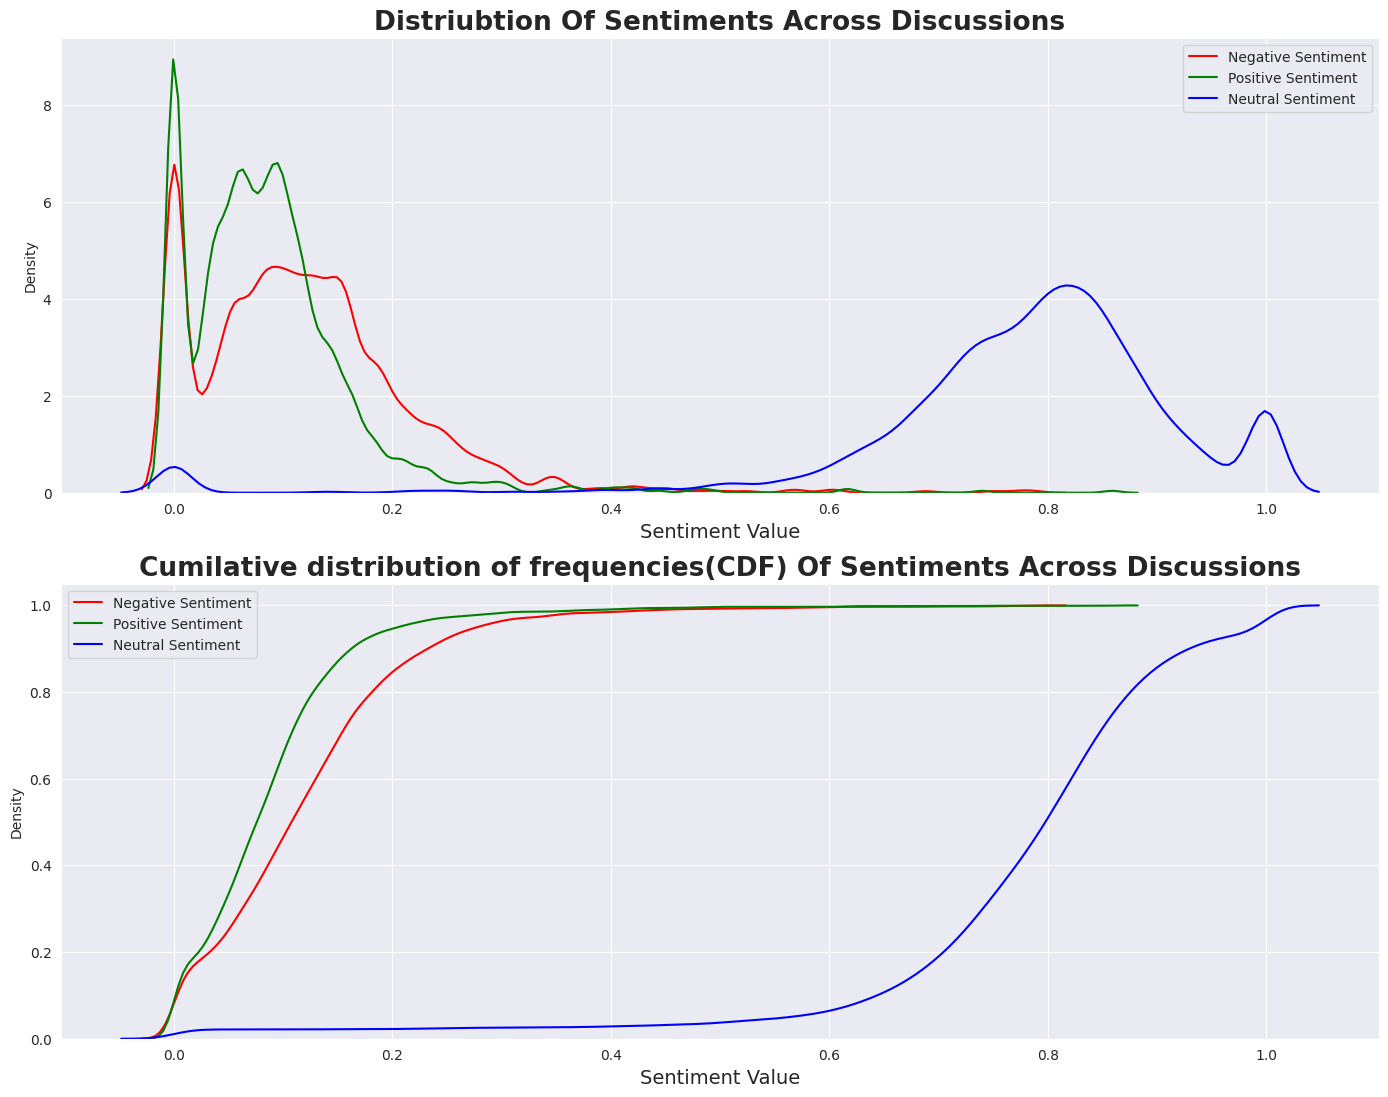

In [82]:
plt.subplot(2,1,1)
colors = ['red', 'green', 'blue']
plt.title('Distriubtion Of Sentiments Across Discussions',fontsize=19,fontweight='bold')
sns.kdeplot(body_data['Negative Sentiment'],bw_method=0.1, color=colors[0], label='Negative Sentiment')
sns.kdeplot(body_data['Positive Sentiment'],bw_method=0.1, color=colors[1], label='Positive Sentiment')
sns.kdeplot(body_data['Neutral Sentiment'],bw_method=0.1, color=colors[2], label='Neutral Sentiment')
plt.legend()  
plt.xlabel('Sentiment Value', fontsize=14)
plt.subplot(2,1,2)
plt.title('Cumilative distribution of frequencies(CDF) Of Sentiments Across Discussions',fontsize=19,fontweight='bold')
sns.kdeplot(body_data['Negative Sentiment'],bw_method=0.1,cumulative=True, color=colors[0], label='Negative Sentiment')
sns.kdeplot(body_data['Positive Sentiment'],bw_method=0.1,cumulative=True, color=colors[1], label='Positive Sentiment')
sns.kdeplot(body_data['Neutral Sentiment'],bw_method=0.1,cumulative=True, color=colors[2], label='Neutral Sentiment')
plt.legend()
plt.xlabel('Sentiment Value', fontsize=14)
#plt.tight_layout()
plt.show()

<a id="4.5"></a>

<h1 style="background-color:gold;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Time based Sentiment Analysis </h1>

In [83]:
#Sorting And Feature Engineering
f_data = body_data.sort_values(by='timestamp')
ft_data=f_data.copy()
ft_data = ft_data.rename(columns={'timestamp':'date'})
ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

In [84]:
ft_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 80915 to 60022
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   body                                    1304 non-null   object 
 1   date                                    1304 non-null   object 
 2   Positive Sentiment                      1304 non-null   float64
 3   Neutral Sentiment                       1304 non-null   float64
 4   Negative Sentiment                      1304 non-null   float64
 5   # Of Words                              1304 non-null   int64  
 6   # Of StopWords                          1304 non-null   int64  
 7   Average Word Length                     1303 non-null   float64
 8   # Of Times Events Was Mentioned         1304 non-null   int64  
 9   # Of Organizations Mentioned            1304 non-null   int64  
 10  # Of Political locations Mentioned      1304 non-null   int6

In [85]:
ft_data.head()

body        date  \
80915  i believe that both israeliand palestinians sh...  2018-09-19   
80586  ive generally lost hope in any possible effect...  2018-10-05   
80732  x200b this is the original map of palestinian ...  2018-10-08   
80804  there are threads onpalestine andisraelpalesti...  2018-10-13   
80731  x200b in case people didnt know 2 rockets were...  2018-10-17   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
80915            0.054001           0.946001            0.000001         108   
80586            0.167001           0.678001            0.156001          94   
80732            0.087001           0.850001            0.063001         226   
80804            0.022001           0.882001            0.096001         110   
80731            0.056001           0.837001            0.107001         179   

       # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
80915              49             6.881356                                0   
80586              41             6.603774                                0   
80732             101             6.616000                                0   
80804              51             7.711864                                0   
80731              77             6.343137                                0   

       # Of Organizations Mentioned  # Of Political locations Mentioned  \
80915                             1                                   5   
80586                             0                                   1   
80732                             0                                   3   
80804                             0                                   0   
80731                             8                                   6   

       # Of Non Political locations Mentioned  year  month  day  day_of_year  \
80915                                       0  2018      9   19          262   
80586                                       0  2018     10    5          278   
80732                                       0  2018     10    8          281   
80804                                       0  2018     10   13          286   
80731                                       0  2018     10   17          290   

       quarter  season  
80915        3       4  
80586        4       4  
80732        4       4  
80804        4       4  
80731        4       4

In [86]:
ft_data_copy = ft_data.copy()
ft_data_copy = ft_data_copy.reset_index().drop(columns=['index','body'])
ft_data_copy = ft_data_copy.rename(columns={'timestamp':'date'})

partitions = []
partitions.append(ft_data_copy.loc[44:np.round(len(ft_data_copy)/3,0)-1,:])
partitions.append(ft_data_copy.loc[np.round(len(ft_data_copy)/3,0):2*int(len(ft_data_copy)/3)-1,:])
partitions.append(ft_data_copy.loc[2*np.round(len(ft_data_copy)/3,0):3*int(len(ft_data_copy)/3)-1,:])



neg_part_means =[]
neg_part_std   =[]
pos_part_means =[]
pos_part_std   =[]
for part in partitions:
    neg_part_means.append(part['Negative Sentiment'].mean())
    neg_part_std.append(part['Negative Sentiment'].std())
    pos_part_means.append(part['Positive Sentiment'].mean())
    pos_part_std.append(part['Positive Sentiment'].std())
    
res_df = pd.DataFrame({'Positive Sentiment Mean':pos_part_means,'Negative Sentiment Mean':neg_part_means,'Positive Sentiment SD':pos_part_std,'Negative Sentiment SD':neg_part_std},
                     index = [f'Partition_{i}' for i in range(1,4)])


def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition_1_Mean'] == temp['Partition_2_Mean'])
    m2 = (temp['Partition_1_SD'] == temp['Partition_2_SD'])
    m3 = (temp['Partition_1_Mean'] < temp['Partition_2_Mean']+3) & (temp['Partition_1_Mean'] > temp['Partition_2_Mean']-3)
    m4 = (temp['Partition_1_SD'] < temp['Partition_2_SD']+3) & (temp['Partition_1_SD'] > temp['Partition_2_SD']-3)

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Partition_1_Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'),        df1['Partition_1_Mean'])
    df1['Partition_2_Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'),        df1['Partition_2_Mean'])
    df1['Partition_1_Mean'] = np.where(m3, 'background-color: {}'.format('gold'),           df1['Partition_1_Mean'])
    df1['Partition_2_Mean'] = np.where(m3, 'background-color: {}'.format('gold'),           df1['Partition_2_Mean'])
    df1['Partition_1_Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition_1_Mean'])
    df1['Partition_2_Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition_2_Mean'])

    df1['Partition_1_SD'] = np.where(~m2, 'background-color: {}'.format('salmon'),        df1['Partition_1_SD'])
    df1['Partition_2_SD'] = np.where(~m2, 'background-color: {}'.format('salmon'),        df1['Partition_2_SD'])
    df1['Partition_1_SD'] = np.where(m4, 'background-color: {}'.format('gold'),           df1['Partition_1_SD'])
    df1['Partition_2_SD'] = np.where(m4, 'background-color: {}'.format('gold'),           df1['Partition_2_SD'])
    df1['Partition_1_SD'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition_1_SD'])
    df1['Partition_2_SD'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition_2_SD'])

    return df1



#res_df.style.apply(highlight_greater,axis=None)
res_df = res_df.T
res_df = pd.DataFrame(res_df.values,columns=res_df.columns,index=['Positive Sentiment','Negative Sentiment','Positive Sentiment','Negative Sentiment'])
res_df = pd.concat([res_df.iloc[:2,:],res_df.iloc[2:,:]],axis=1)
res_df.columns = ['Partition_1_Mean','Partition_2_Mean','Partition_3_Mean','Partition_1_SD','Partition_2_SD','Partition_3_SD']
res_df.style.apply(highlight_greater,axis=None)

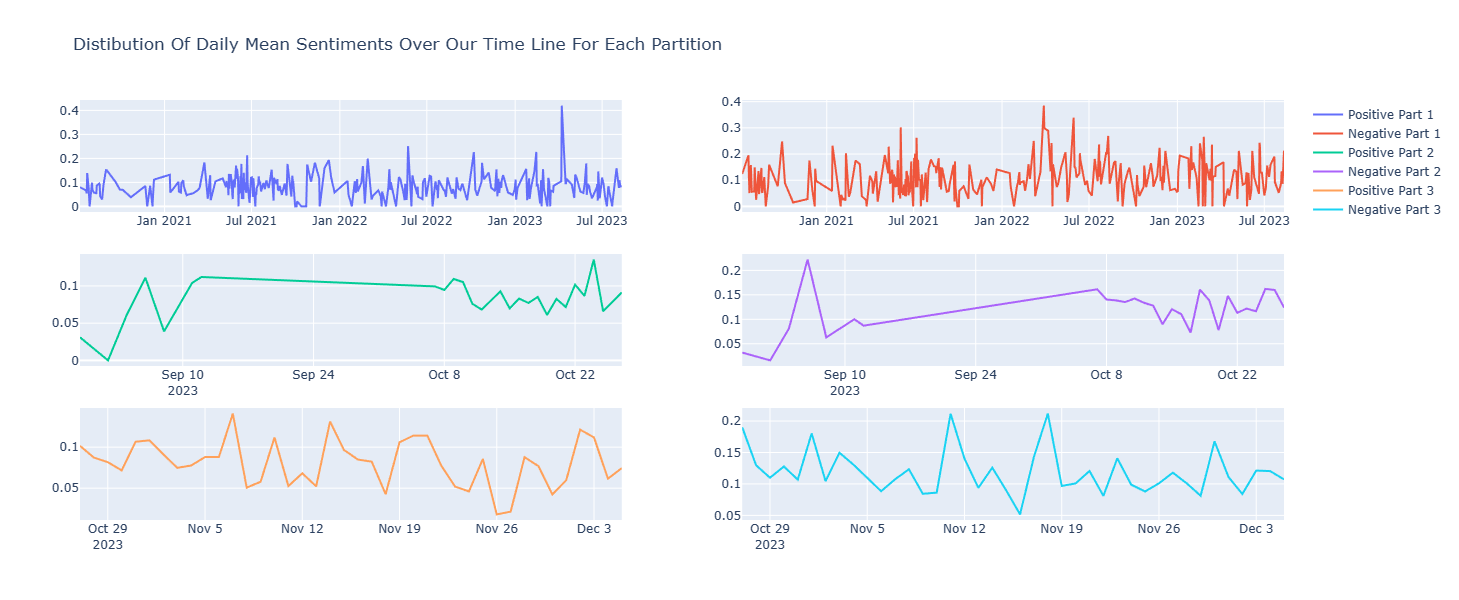

In [87]:

fig = make_subplots(rows=3, cols=2)

for idx,prt in enumerate(partitions):
    by_date = prt.groupby(by='date').mean().reset_index()
    fig.add_trace(
    go.Scatter(x=by_date['date'], y=by_date['Positive Sentiment'],name=f'Positive Part {idx+1}'),
    row=idx+1, col=1)
    fig.add_trace(
    go.Scatter(x=by_date['date'], y=by_date['Negative Sentiment'],name=f'Negative Part {idx+1}'),
    row=idx+1, col=2)

fig.update_layout(height=600, width=900, title_text="Distibution Of Daily Mean Sentiments Over Our Time Line For Each Partition")
fig.show()


In [88]:
ft_data

body        date  \
80915  i believe that both israeliand palestinians sh...  2018-09-19   
80586  ive generally lost hope in any possible effect...  2018-10-05   
80732  x200b this is the original map of palestinian ...  2018-10-08   
80804  there are threads onpalestine andisraelpalesti...  2018-10-13   
80731  x200b in case people didnt know 2 rockets were...  2018-10-17   
...                                                  ...         ...   
70293  now most of hamas hq is based in khan younis s...  2023-12-05   
90317  one third of the reported palestinians deaths ...  2023-12-05   
60021  one third of the reported palestinians deaths ...  2023-12-05   
70329  can you confirm withcredible sourcecouldnfind ...  2023-12-05   
60022  amit soussana 40 who was recently freed from c...  2023-12-05   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
80915            0.054001           0.946001            0.000001         108   
80586            0.167001           0.678001            0.156001          94   
80732            0.087001           0.850001            0.063001         226   
80804            0.022001           0.882001            0.096001         110   
80731            0.056001           0.837001            0.107001         179   
...                   ...                ...                 ...         ...   
70293            0.072001           0.886001            0.042001         117   
90317            0.075001           0.678001            0.248001         399   
60021            0.075001           0.678001            0.247001         400   
70329            0.000001           1.000001            0.000001          10   
60022            0.055001           0.759001            0.187001         177   

       # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
80915              49             6.881356                                0   
80586              41             6.603774                                0   
80732             101             6.616000                                0   
80804              51             7.711864                                0   
80731              77             6.343137                                0   
...               ...                  ...                              ...   
70293              57             5.500000                                0   
90317             163             6.576271                                0   
60021             163             6.569620                                0   
70329               2             8.750000                                0   
60022              71             6.405660                                0   

       # Of Organizations Mentioned  # Of Political locations Mentioned  \
80915                             1                                   5   
80586                             0                                   1   
80732                             0                                   3   
80804                             0                                   0   
80731                             8                                   6   
...                             ...                                 ...   
70293                             2                                   3   
90317                            13                                   8   
60021                            13                                   8   
70329                             0                                   0   
60022                             2                                   8   

       # Of Non Political locations Mentioned  year  month  day  day_of_year  \
80915                                       0  2018      9   19          262   
80586                                       0  2018     10    5          278   
80732                                       0  2018     10    8          281   
80804                                       0  2018     

In [89]:
b_date_mean = ft_data_copy.groupby(by='date').mean().reset_index()
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))

ax[0].set_title('Positive Autocorrelation Analysis ',fontsize=18,fontweight='bold')
autocorrelation_plot(b_date_mean['Positive Sentiment'],ax=ax[0],lw=3)
ax[1].set_title('Negative Autocorrelation Analysis ',fontsize=18,fontweight='bold')
autocorrelation_plot(b_date_mean['Negative Sentiment'],ax=ax[1],color='tab:red',lw=3)
plt.show()

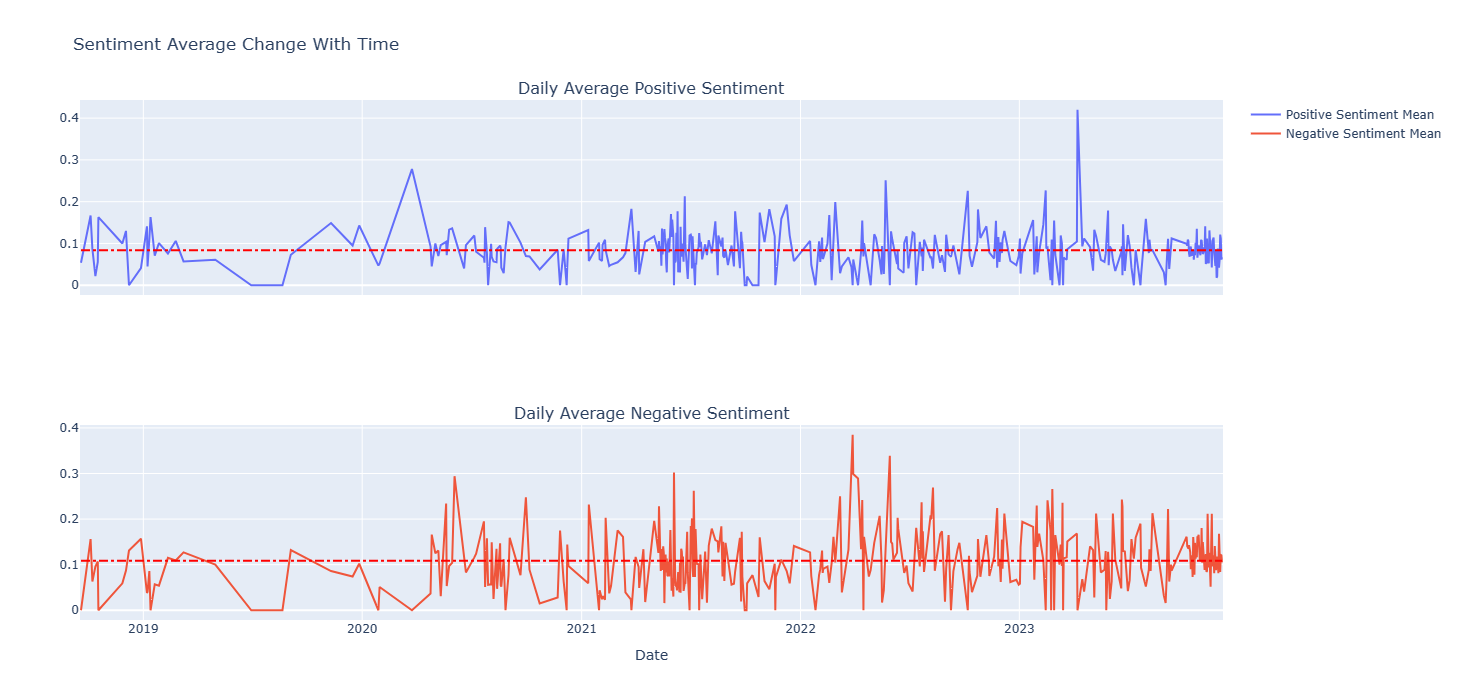

In [90]:
b_date_mean = ft_data_copy.groupby(by='date').mean().reset_index()
b_date_std = ft_data_copy.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)




fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)


fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

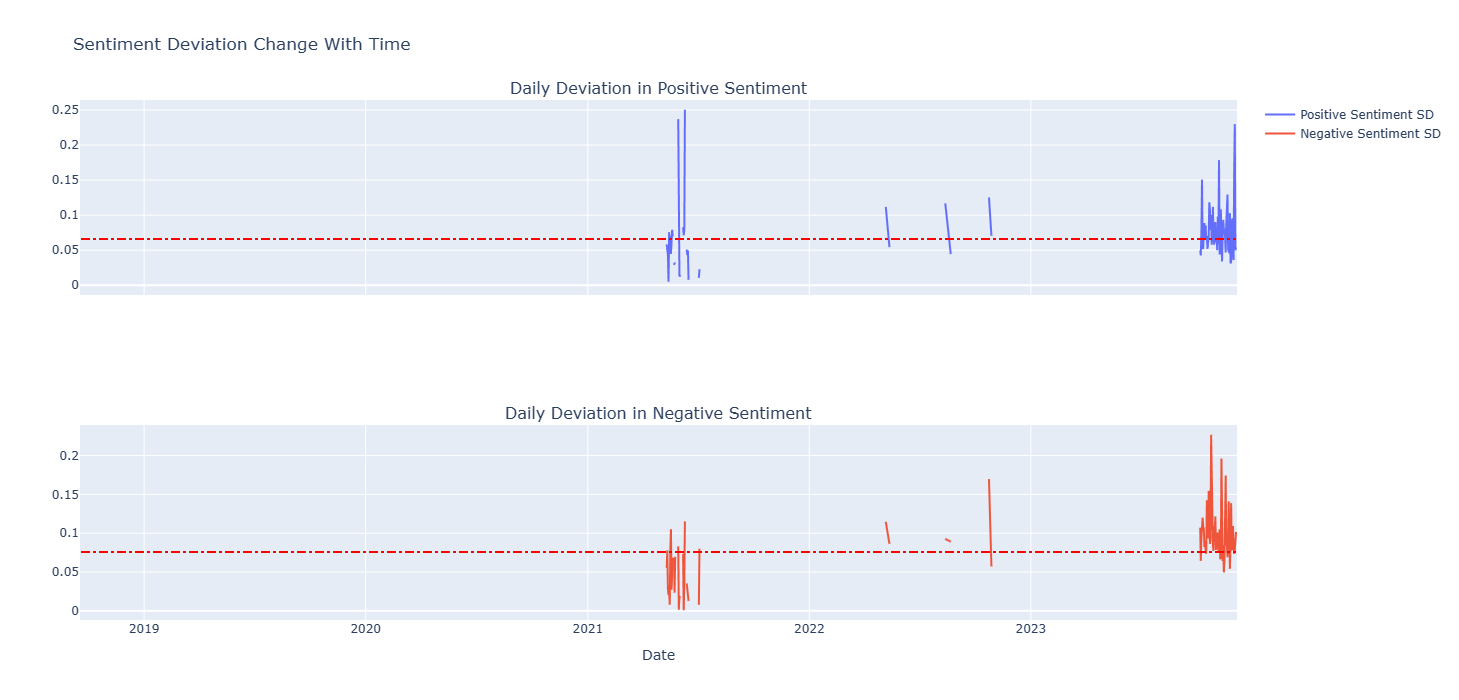

In [91]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Deviation in Positive Sentiment',  'Daily Deviation in Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Positive Sentiment'],name='Positive Sentiment SD'),
    row=1, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Negative Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_std['date'].values[0], y0=b_date_std['Positive Sentiment'].mean(), x1=b_date_std['date'].values[-1], y1=b_date_std['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1', 
        yref='y1'
)


fig.add_trace(
    go.Scatter(x=b_date_std['date'], y=b_date_std['Negative Sentiment'],name='Negative Sentiment SD'),
    row=2, col=1
)

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Deviation Change With Time")
fig.show()

In [92]:
b_date_count = ft_data_copy.groupby(by='date').count().reset_index()

In [93]:
b_date_count

date  Positive Sentiment  Neutral Sentiment  Negative Sentiment  \
0    2018-09-19                   1                  1                   1   
1    2018-10-05                   1                  1                   1   
2    2018-10-08                   1                  1                   1   
3    2018-10-13                   1                  1                   1   
4    2018-10-17                   1                  1                   1   
..          ...                 ...                ...                 ...   
402  2023-12-01                  16                 16                  16   
403  2023-12-02                   9                  9                   9   
404  2023-12-03                  13                 13                  13   
405  2023-12-04                   7                  7                   7   
406  2023-12-05                  13                 13                  13   

     # Of Words  # Of StopWords  Average Word Length  \
0             1               1                    1   
1             1               1                    1   
2             1               1                    1   
3             1               1                    1   
4             1               1                    1   
..          ...             ...                  ...   
402          16              16                   16   
403           9               9                    9   
404          13              13                   13   
405           7               7                    7   
406          13              13                   13   

     # Of Times Events Was Mentioned  # Of Organizations Mentioned  \
0                                  1                             1   
1                                  1                             1   
2                                  1                             1   
3                                  1                             1   
4                                  1                             1   
..                               ...                           ...   
402                               16                            16   
403                                9                             9   
404                               13                            13   
405                                7                             7   
406                               13                            13   

     # Of Political locations Mentioned  \
0                                     1   
1                                     1   
2                                     1   
3                                     1   
4                                     1   
..                                  ...   
402                                  16   
403                                   9   
404                                  13   
405                                   7   
406                                  13   

     # Of Non Political locations Mentioned  year  month  day  day_of_year  \
0                                         1     1      1    1            1   
1                                         1     1      1    1            1   
2                                         1     1      1    1            1   
3                                         1     1      1    1            1   
4                                         1     1      1    1            1   
..                                      ...   ...    ...  ...          ...   
402                                      16    16     16   16           16   
403                                       9     9      9    9            9   
404                                      13    13     13   13           13   
405                                       7     7      7    7            7   
406                                      13    13     13   13           13   

     quarter  season  
0          1       1  
1          1       1  
2          1       1  
3          1  

In [94]:
b_date_count = b_date_count.rename(columns={'title':'Posts Per Day'})
b_date_count

date  Positive Sentiment  Neutral Sentiment  Negative Sentiment  \
0    2018-09-19                   1                  1                   1   
1    2018-10-05                   1                  1                   1   
2    2018-10-08                   1                  1                   1   
3    2018-10-13                   1                  1                   1   
4    2018-10-17                   1                  1                   1   
..          ...                 ...                ...                 ...   
402  2023-12-01                  16                 16                  16   
403  2023-12-02                   9                  9                   9   
404  2023-12-03                  13                 13                  13   
405  2023-12-04                   7                  7                   7   
406  2023-12-05                  13                 13                  13   

     # Of Words  # Of StopWords  Average Word Length  \
0             1               1                    1   
1             1               1                    1   
2             1               1                    1   
3             1               1                    1   
4             1               1                    1   
..          ...             ...                  ...   
402          16              16                   16   
403           9               9                    9   
404          13              13                   13   
405           7               7                    7   
406          13              13                   13   

     # Of Times Events Was Mentioned  # Of Organizations Mentioned  \
0                                  1                             1   
1                                  1                             1   
2                                  1                             1   
3                                  1                             1   
4                                  1                             1   
..                               ...                           ...   
402                               16                            16   
403                                9                             9   
404                               13                            13   
405                                7                             7   
406                               13                            13   

     # Of Political locations Mentioned  \
0                                     1   
1                                     1   
2                                     1   
3                                     1   
4                                     1   
..                                  ...   
402                                  16   
403                                   9   
404                                  13   
405                                   7   
406                                  13   

     # Of Non Political locations Mentioned  year  month  day  day_of_year  \
0                                         1     1      1    1            1   
1                                         1     1      1    1            1   
2                                         1     1      1    1            1   
3                                         1     1      1    1            1   
4                                         1     1      1    1            1   
..                                      ...   ...    ...  ...          ...   
402                                      16    16     16   16           16   
403                                       9     9      9    9            9   
404                                      13    13     13   13           13   
405                                       7     7      7    7            7   
406                                      13    13     13   13           13   

     quarter  season  
0          1       1  
1          1       1  
2          1       1  
3          1  

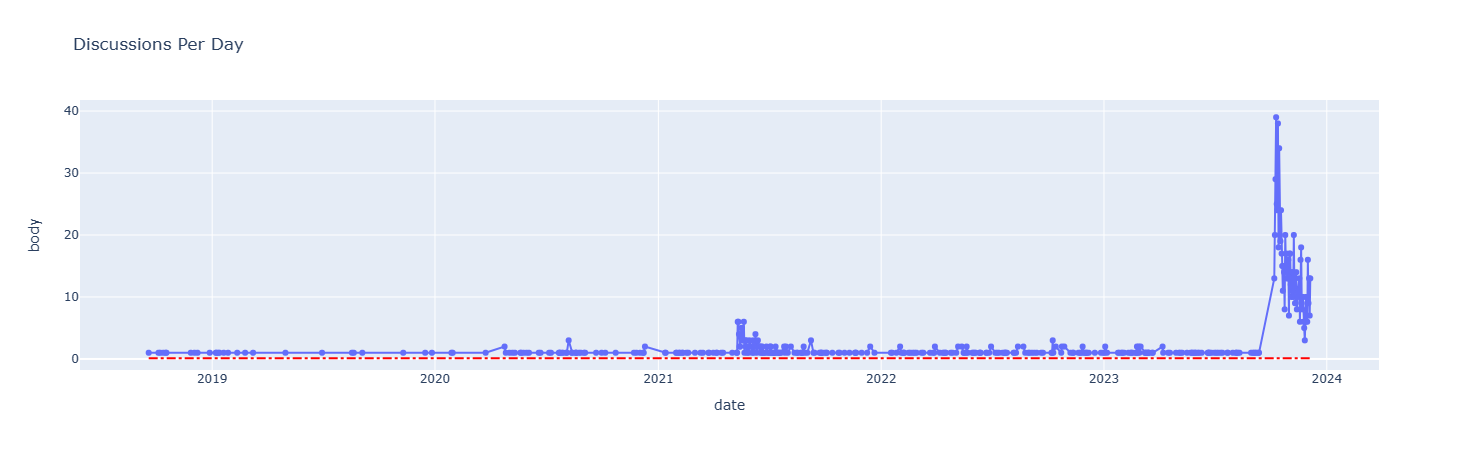

In [95]:
import plotly.express as ex
import plotly.graph_objects as go

# Assuming 'ft_data' is your DataFrame
b_date_count = ft_data.groupby(by='date').count().reset_index()

# Create a line chart using plotly express
fig = ex.line(b_date_count, x='date', y='body', title='Discussions Per Day')

# Add a horizontal line at the mean value of 'Negative Sentiment'
mean_negative_sentiment = ft_data['Negative Sentiment'].mean()
fig.add_shape(
    type="line",
    x0=b_date_count['date'].values[0],
    y0=mean_negative_sentiment,
    x1=b_date_count['date'].values[-1],
    y1=mean_negative_sentiment,
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
    name='Mean Negative Sentiment',
)

# Set the trace mode to show markers and lines
fig.update_traces(mode="markers+lines")

# Set the hover mode to show information for all points along the x-axis
fig.update_layout(hovermode="x unified")

# Show the figure
fig.show()


In [96]:
sid = SIA()
body_data['sentiments']           = body_data['body'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_data['Compound Sentiment']   = body_data['sentiments'].apply(lambda x: x['compound']+1*(10**-6))
body_data.drop(columns=['sentiments'],inplace=True)

In [97]:
conditions = [
    (body_data['Compound Sentiment'] <= -0.5),
    (body_data['Compound Sentiment'] > -0.5) & (body_data['Compound Sentiment'] < 0.5),
    (body_data['Compound Sentiment'] > 0.5)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
body_data['Category'] = np.select(conditions, values)

In [98]:
#Group the DataFrame by 'Category' and count the occurrences of each category
category_counts = body_data.groupby(['Category'])['Category'].count()

# Create a DataFrame with counts and rename the column to 'Counts'
counts_df = pd.DataFrame(category_counts).rename(columns={"Category": "Counts"})

# Calculate the percentage for each category and add it as a new column 'Percentage'
counts_df['Percentage'] = (counts_df['Counts'] / counts_df['Counts'].sum()) * 100

#counts_df = counts_df.drop(index='0')

# Print or return the summary DataFrame
print(counts_df)

          Counts  Percentage
Category                    
Negative     631   48.389571
Neutral      417   31.978528
Positive     256   19.631902


<a id="5"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Results</h1>

<a id="5.1"></a>
### Pie Chart of sentiment count

In [99]:
import plotly.express as px

# Create a Pie Chart using Plotly
fig = px.pie(counts_df, values='Counts', names=counts_df.index, 
             labels={'Category': 'Sentiment Category', 'Counts': 'Count'},
             title='Distribution of Sentiment Categories in Discussions',
             hole=0.3, 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Set the background color of the Pie Chart to white
#fig.update_layout(paper_bgcolor='white')

# Show the Plotly Pie Chart
fig.show()

<a id="5.2"></a>
### Positive Score Comments

In [100]:
# Select the top 50 discussions with the highest 'Compound' scores from the DataFrame
top_50_pos_discussions = body_data.nlargest(n=50, columns=['Compound Sentiment'])["body"]

# This line selects the top 50 comments based on their 'Compound' scores,
# indicating the 50 comments with the most positive sentiment.

print(top_50_pos_discussions)

80324    the common pro israel talking point on social ...
80563    the united nations general assembly29 november...
80073    all my sources are wikipedia or quick googling...
80278    crosspost fromisraelpalestine too many people ...
80998    my article about the israeli and palestinian d...
10362    hello everyonempalestinian living abroad altho...
60586    free cambodia free china free iran free the re...
70       resolving the hamas israel conflict here it is...
80162    ian american jew and canhelp but wonder how ha...
10215    i understand the sentiment the injustice many ...
80707    i know the conventional wisdom is that israel ...
10080    north korea supports hamas south korea support...
80625    folks on both sides havetendency to use pollin...
60388    i honestly feel this conflict may never end th...
10288    first of allam not your conventional arabssupp...
10236    a point repeatedly brought up while discussing...
80846    article from jpost israel hasjewish nation sta.

<a id="5.3"></a>
### Negative Score Comments

In [101]:
# Select the top 50 comments with the least 'Compound' scores from the DataFrame
top_50_neg_comments = body_data.nsmallest(n=50, columns=['Compound Sentiment'])["body"]

print(top_50_neg_comments)

80014    source the washington post how shireen abu akl...
80430    this isdesperate place every young man here ha...
10101    1 you might be an anti semite if you describe ...
10193    i often hear that arab israelis are equal to j...
10216    anti zionism may not be anti semitism but anti...
10311    hello every one my name is danielam an israeli...
10415    i sawlot of people claim israel is releasing i...
80307    updates nov 22 hello everyonehave compiledlist...
80432    while most zionists dondeny the nakba occurred...
80437    the sbarro restaurant suicide bombing also cal...
80576    this is the original post byarisv 43 israeli b...
10330    original title was can we please stop blaming ...
10230    hi allve been wanting to share my story forwhi...
60051    israeli prime minister benjamin netanyahu addr...
10093    firstwant to say thatam an american democrat a...
10277    i live in israel butve never really felt israe...
10119    seeingpalestine haslot of fresh comments about.

In [102]:
body_data.head(1)

body   timestamp  \
8  ita bizarre accident of history that the pales...  2023-10-15   

   Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
8            0.094001           0.770001            0.136001         239   

   # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
8              83             6.435897                                0   

   # Of Organizations Mentioned  # Of Political locations Mentioned  \
8                             2                                   2   

   # Of Non Political locations Mentioned  Compound Sentiment  Category  
8                                       0           -0.932599  Negative

### Visualization of the Sentiment Scores of Positive, Neutral & Negative Posts

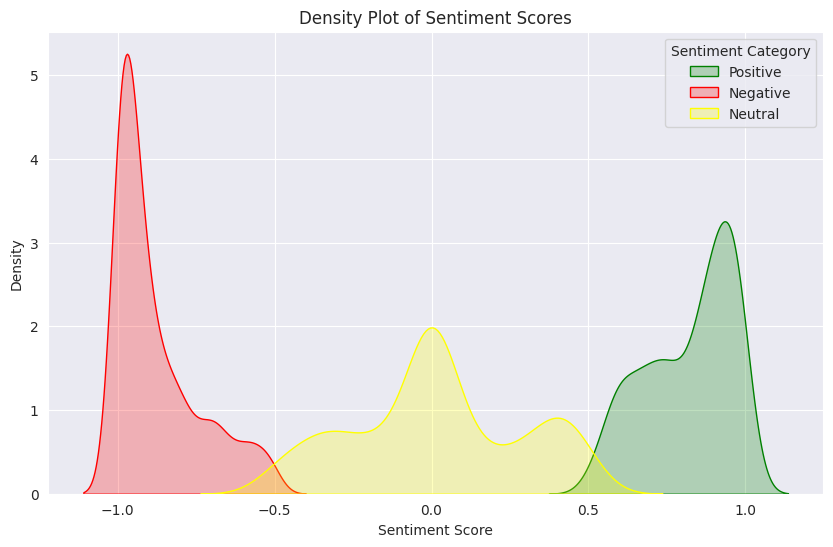

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the sentiment categories and corresponding colors
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over sentiment categories and plot KDE
for category, color in zip(sentiment_categories, colors):
    sns.kdeplot(body_data[body_data['Category'] == category]['Compound Sentiment'], 
                color=color, label=category, shade=True)

# Set plot labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()


<a id="5.4"></a>
### Visualization of Sentiment scores

<Axes: xlabel='Compound Sentiment', ylabel='Density'>

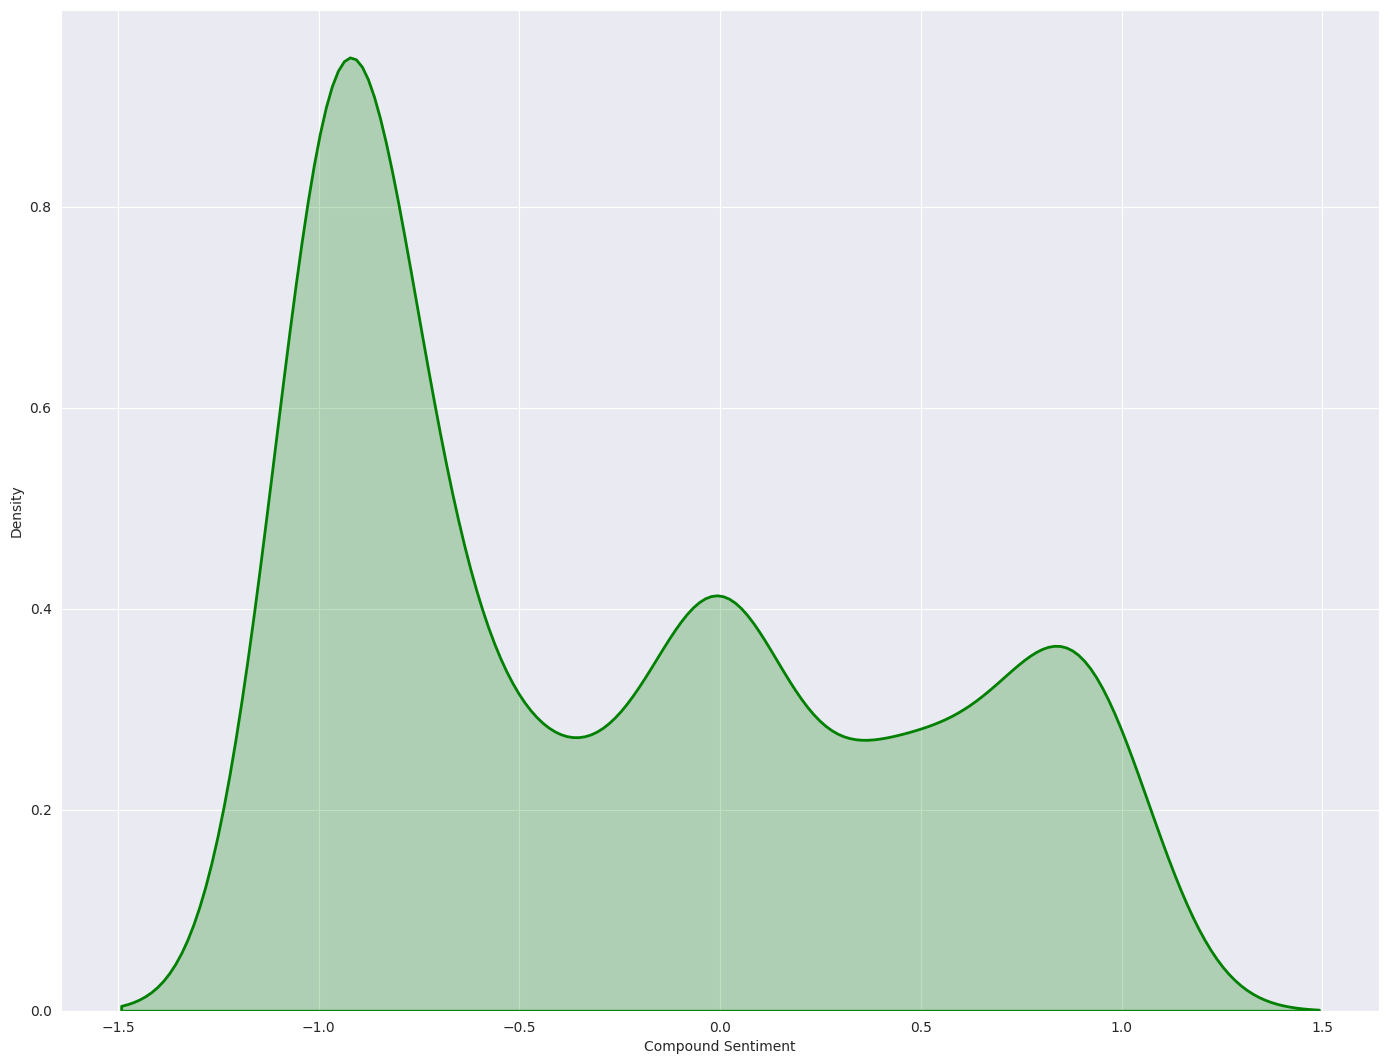

In [104]:
sns.distplot(body_data["Compound Sentiment"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

<a id="5.5"></a>
### WordCloud of All Sentiments

In [105]:
# Concatenate all comments into a single string
text = " ".join(ft_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="white",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### WordCloud of Neutral Sentiments


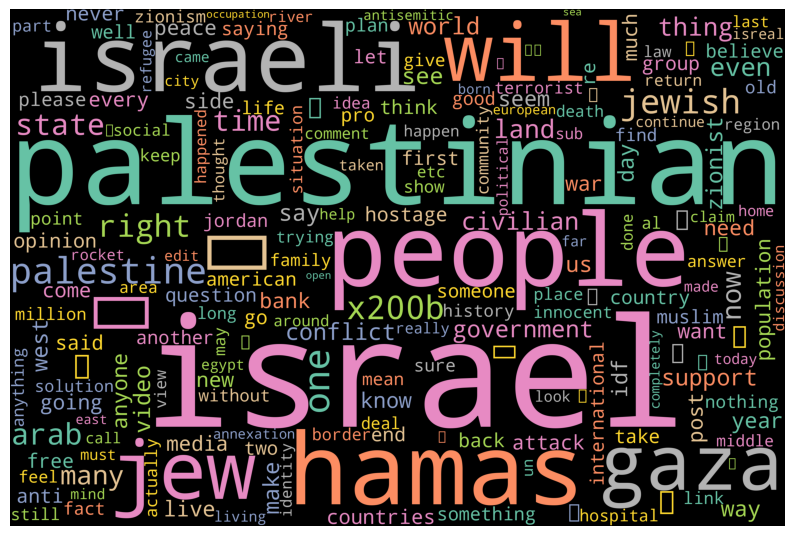

In [106]:
# Concatenate all comments into a single string
neutral_data = body_data[body_data['Category'] == 'Neutral']
text = " ".join(neutral_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### WordCloud of Positive Sentiments


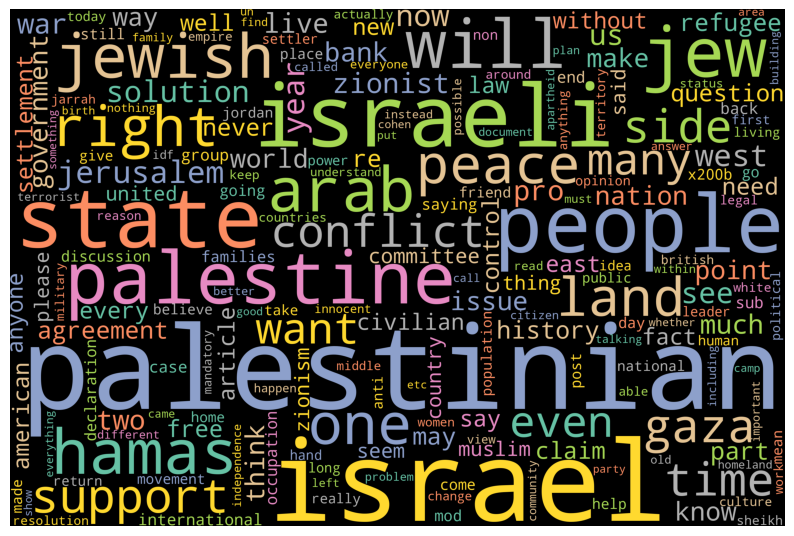

In [107]:
# Concatenate all comments into a single string
positive_data = body_data[body_data['Category'] == 'Positive']
text = " ".join(positive_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### WordCloud of Negative Sentiments


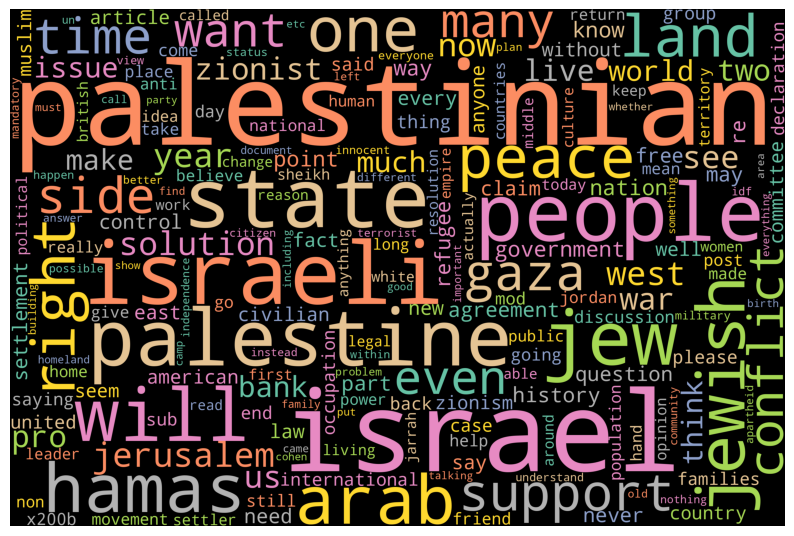

In [108]:
# Concatenate all comments into a single string
negative_data = body_data[body_data['Category'] == 'Positive']
text = " ".join(negative_data['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(10, 8))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


<a id="5.6"></a>

<h1 style="background-color:dodgerblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Frequency of  words for Sentiments </h1>


In [109]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Tokenize and clean text
def process_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Separate positive and negative sentiment
positive_words = ' '.join(body_data[body_data['Category'] == 'Positive']['body'])
negative_words = ' '.join(body_data[body_data['Category'] == 'Negative']['body'])
neutral_words = ' '.join(body_data[body_data['Category'] == 'Neutral']['body'])
all_words = ' '.join(body_data['body'])

# Process text
positive_tokens = process_text(positive_words)
negative_tokens = process_text(negative_words)
neutral_tokens = process_text(neutral_words)
all_tokens = process_text(all_words)

# Get most common words
most_common_positive = Counter(positive_tokens).most_common(10)
most_common_negative = Counter(negative_tokens).most_common(10)
most_common_neutral = Counter(neutral_tokens).most_common(10)
most_common_all = Counter(all_tokens).most_common(10)

In [110]:
import matplotlib.pyplot as plt

colors = [
    'purple', 'orange', 'cyan', 'magenta', 'yellow',
    'brown', 'pink', 'violet', 'indigo', 'teal', 'olive', 'maroon', 'navy',
    'aquamarine', 'gold', 'darkred', 'lime', 'mediumblue']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14,4))

# Positive sentiment
positive_words, positive_counts = zip(*most_common_positive)
axes[0].barh(positive_words, positive_counts, color='green')
axes[0].set_title('Frequent Words for Positive Sentiment')

# Negative sentiment
negative_words, negative_counts = zip(*most_common_negative)
axes[1].barh(negative_words, negative_counts, color='red')
axes[1].set_title('Frequent Words for Negative Sentiment')

plt.show()


In [111]:
body_data

body   timestamp  \
8       ita bizarre accident of history that the pales...  2023-10-15   
14      i have been following this war ever since it w...  2023-10-27   
16                                                         2023-10-18   
18      last week pro zionists here and else where cla...  2023-11-10   
19      hamasisisis google drive watch images at your ...  2023-11-03   
...                                                   ...         ...   
115180  if you re new to the community introduce yourself  2023-10-17   
115181                                              x200b  2023-10-12   
115197  this community reveals to the world the true f...  2023-10-12   
115207  a place for members ofhamasdeadlyattack to cha...  2023-10-12   
115225                                                     2023-11-04   

        Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
8                 0.094001           0.770001            0.136001         239   
14                0.098001           0.664001            0.239001         124   
16                0.000001           0.000001            0.000001           1   
18                0.093001           0.663001            0.245001          77   
19                0.000001           0.903001            0.097001          14   
...                    ...                ...                 ...         ...   
115180            0.000001           1.000001            0.000001           9   
115181            0.000001           1.000001            0.000001           1   
115197            0.082001           0.678001            0.240001          72   
115207            0.000001           1.000001            0.000001          10   
115225            0.000001           0.000001            0.000001           1   

        # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
8                   83             6.435897                                0   
14                  60             6.515625                                0   
16                   0             0.000000                                0   
18                  35             6.023810                                0   
19                   6             7.125000                                0   
...                ...                  ...                              ...   
115180               5             5.750000                                0   
115181               0             5.000000                                0   
115197              35             6.891892                                0   
115207               6             8.750000                                0   
115225               0             0.000000                                0   

        # Of Organizations Mentioned  # Of Political locations Mentioned  \
8                                  2                                   2   
14                                 4                                   3   
16                                 0                                   0   
18                                 3                                   1   
19                                 0                                   0   
...                              ...                                 ...   
115180                             0                                   0   
115181                             0                                   0   
115197                             2                                   1   
115207                             0                                   0   
115225                             0                                   0   

        # Of Non Political locations Mentioned  Compound Sentiment  Category  
8                                            0           -0.932599  Negative  
14                                           0           -0.980899  Negative  
16                                           0            0.000001   Neutral  
18           

In [112]:
body_data.head()

body   timestamp  \
8   ita bizarre accident of history that the pales...  2023-10-15   
14  i have been following this war ever since it w...  2023-10-27   
16                                                     2023-10-18   
18  last week pro zionists here and else where cla...  2023-11-10   
19  hamasisisis google drive watch images at your ...  2023-11-03   

    Positive Sentiment  Neutral Sentiment  Negative Sentiment  # Of Words  \
8             0.094001           0.770001            0.136001         239   
14            0.098001           0.664001            0.239001         124   
16            0.000001           0.000001            0.000001           1   
18            0.093001           0.663001            0.245001          77   
19            0.000001           0.903001            0.097001          14   

    # Of StopWords  Average Word Length  # Of Times Events Was Mentioned  \
8               83             6.435897                                0   
14              60             6.515625                                0   
16               0             0.000000                                0   
18              35             6.023810                                0   
19               6             7.125000                                0   

    # Of Organizations Mentioned  # Of Political locations Mentioned  \
8                              2                                   2   
14                             4                                   3   
16                             0                                   0   
18                             3                                   1   
19                             0                                   0   

    # Of Non Political locations Mentioned  Compound Sentiment  Category  
8                                        0           -0.932599  Negative  
14                                       0           -0.980899  Negative  
16                                       0            0.000001   Neutral  
18                                       0           -0.957799  Negative  
19                                       0           -0.102699   Neutral